In [1]:
import pandas as pd
import numpy as np
import os
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import cv2
%matplotlib inline

In [2]:
categories = ["dogs","dogswithhats"]
test_folder=r'C:/Users/emill/PycharmProjects/NN_from_scratch/imgs'

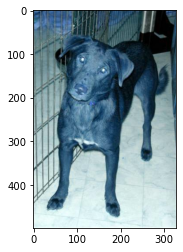

In [3]:
# Lets look at one of the pictures
for category in categories:
    path = os.path.join(test_folder, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_ANYCOLOR)
        plt.imshow(img_array)
        plt.show()
        break
    break

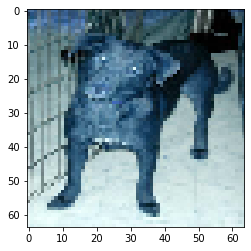

In [4]:
# Resize to 64x64 for performace
img_size=64
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_array)

In [5]:
# Get all the data
categories = ["dogs","dogswithhats"]
data = []
def create_training_data():
    for category in categories:
        path = os.path.join(test_folder, category)
        class_num=categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_ANYCOLOR)
                new_array = cv2.resize(img_array,(img_size,img_size))
                data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [6]:
# Shuffle the training data
import random
random.shuffle(data)

In [7]:
X = []
y = []

In [8]:
# put the training data in X and y
for features, label in data:
    X.append(features)
    y.append(label)
#reshape X
X=np.array(X).reshape(-1,img_size,img_size,3)

In [29]:
# _raw is for later cause keras takes other input
print("Length of X",X.shape[0])
print("Length of y",len(y))
test_X_raw=X[4879:,:,:,:] # take 500 images for testing
train_X_raw=X[0:4879,:,:,:]

test_y_raw=y[4879:]
train_y_raw=y[0:4879]

# check that shapes are correct
print("Test_X length",test_X_raw.shape[0]) 
print("Test_y length",len(test_y_raw))
# lets also make train_y numpy rray
train_y_raw=np.array([train_y_raw])
test_y_raw=np.array([test_y_raw])

Length of X 5379
Length of y 5379
Test_X length 500
Test_y length 500


In [11]:
# To get our X into the NN we create a featurevector that is a long vector with shape (12288,n)
featurevector = train_X_raw.reshape(train_X_raw.shape[0],-1).T
featurevector.shape
train_X = featurevector / 255
print(train_X.shape)

# Do the same for testing 
testfeaturevector = test_X_raw.reshape(test_X_raw.shape[0],-1).T
testfeaturevector.shape
test_X = testfeaturevector / 255
print(test_X.shape)

(12288, 4879)
(12288, 500)


In [12]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(1)
    

    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y,1))

    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters    

In [13]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):

        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [14]:
# GRADED FUNCTION: linear_forward

def linear_forward(A, W, b):
    """

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    Z = np.dot(W,A) + b
    ### END CODE HERE ###
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [15]:
def linear_activation_forward(A_prev, W, b, activation):
    """

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    
    if activation == "sigmoid":

        Z, linear_cache = linear_forward(A_prev,W,b)
        A = 1/(1+np.exp(-Z))
        activation_cache = Z
        
        ### END CODE HERE ###
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A = np.maximum(0,Z)
        activation_cache = Z

    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [16]:
def L_model_forward(X, parameters):
    """
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """
    
    caches = []
    A = X
    L = len(parameters) // 2

    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W'+ str(l)], parameters["b" + str(l)], 'relu')
        caches.append(cache)
        
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)],parameters["b" + str(L)] , 'sigmoid')
    caches.append(cache)

    
    assert(AL.shape == (1,X.shape[1]))
    
    return AL, caches

In [17]:
def compute_cost(AL, Y):
    """

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    m = Y.shape[1]

    cost = - 1/m * np.sum(Y * np.log(AL) + (1-Y) * np.log(1-AL))

    
    cost = np.squeeze(cost)      
    assert(cost.shape == ())
    
    return cost

In [18]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1 / m * np.dot(dZ, A_prev.T)
    db = 1 / m * np.sum(dZ,axis=1,keepdims=True)
    dA_prev = np.dot(W.T,dZ)

    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [19]:
def linear_activation_backward(dA, cache, activation):
    """
    
    Arguments:
    dA -- post-activation gradient for current layer l
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = np.array(dA, copy = True)
        dZ[activation_cache <= 0] = 0
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    elif activation == "sigmoid":
        sig = 1 / (1 + np.exp(-activation_cache))
        dZ = dA * sig * (1 - sig)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

In [20]:
def L_model_backward(AL, Y, caches):
    """
   
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [21]:
def update_parameters(parameters, grads, learning_rate):
    """
   
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
    return parameters

In [22]:
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [23]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.01, num_iterations = 4000, print_cost=False):
    """
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        A1, cache1 = linear_activation_forward(X, W1, b1, activation='relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation='sigmoid')
        # Compute cost
        cost = compute_cost(A2, Y)
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation='sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation='relu')
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
        
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    return parameters


Cost after iteration 0: 0.6924015191974776
Cost after iteration 100: 0.5979498019305554
Cost after iteration 200: 0.5590235905238546
Cost after iteration 300: 0.5459778315722413
Cost after iteration 400: 0.5398208696618286
Cost after iteration 500: 0.534398446204568
Cost after iteration 600: 0.5292345459209813
Cost after iteration 700: 0.5237359671119629
Cost after iteration 800: 0.5173841182839
Cost after iteration 900: 0.5102123623824651
Cost after iteration 1000: 0.5034815712789215
Cost after iteration 1100: 0.4966792359589655
Cost after iteration 1200: 0.4930237819519121
Cost after iteration 1300: 0.48772066967698247
Cost after iteration 1400: 0.4834976887285165
Cost after iteration 1500: 0.480111639199359
Cost after iteration 1600: 0.477918364855173
Cost after iteration 1700: 0.4770050762551915
Cost after iteration 1800: 0.4719222979954782
Cost after iteration 1900: 0.4653376573525558
Cost after iteration 2000: 0.4656670340322581
Cost after iteration 2100: 0.4651627954075933
Cost 

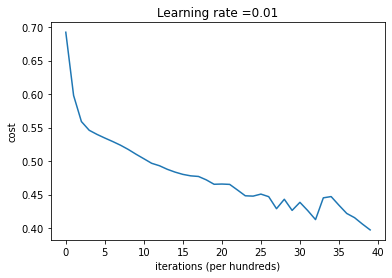

In [31]:
parameters = two_layer_model(train_X, train_y_raw, layers_dims = (n_x, n_h, n_y), num_iterations = 4000, print_cost=True)

In [30]:
test_X=test_X.T

array([[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 

In [32]:
# To create a "predict" function we just do the forward pass and get the activation 
# of the output layer (sigmoid) and if it is >0.5 then we classify it as a dog with a hat
def NNnumpypredict(parameters,X):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    A1, cache1 = linear_activation_forward(X, W1, b1, activation='relu')
    A2, cache2 = linear_activation_forward(A1, W2, b2, activation='sigmoid')
    return A2

In [41]:
# Test predictions
probs_test=NNnumpypredict(parameters,test_X)
predsarray_test=np.where(probs_test < 0.50, 0, 1)
# Train predictions
probs_train=NNnumpypredict(parameters,train_X)
predsarray_train=np.where(probs_train < 0.50, 0, 1)

# Test
test_incorrect=0
for i in range(500):
    if predsarray_test[0][i] == test_y_raw[0][i]:
        test_incorrect+=1

# Train
train_incorrect=0
for i in range(500):
    if predsarray_train[0][i] == train_y_raw[0][i]:
        train_incorrect+=1
      
print("Train accuracy:",train_incorrect/500)
print("Test accuracy:",test_incorrect/500)

Train accuracy: 0.828
Test accuracy: 0.778


**Not the best not the worst**

# Create basic CNN for comparison

In [62]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
#import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

In [108]:
def doghatmodel(input_shape):
    
    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    X = MaxPooling2D((2, 2), name='max_pool')(X)

    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    model = Model(inputs = X_input, outputs = X, name='doghatmodel')
    
    return model

In [110]:
doghatmodel = doghatmodel(train_X_raw.shape[1:])

In [111]:
import keras
opt = keras.optimizers.Adam()
doghatmodel.compile(loss='binary_crossentropy', optimizer=opt,metrics = ["accuracy"])

In [131]:
doghatmodel.fit(train_X_raw, train_y_raw[0], batch_size=16,epochs=20)

Epoch 1/20
305/305 [==============================] - 21s 66ms/step - loss: 1.3977 - accuracy: 0.7548
Epoch 2/20
305/305 [==============================] - 21s 70ms/step - loss: 0.8055 - accuracy: 0.8033
Epoch 3/20
305/305 [==============================] - 23s 74ms/step - loss: 0.5150 - accuracy: 0.8523
Epoch 4/20
305/305 [==============================] - 21s 68ms/step - loss: 0.3872 - accuracy: 0.8770
Epoch 5/20
305/305 [==============================] - 20s 66ms/step - loss: 0.4274 - accuracy: 0.8674
Epoch 6/20
305/305 [==============================] - 21s 68ms/step - loss: 0.2080 - accuracy: 0.9179
Epoch 7/20
305/305 [==============================] - 23s 76ms/step - loss: 0.1830 - accuracy: 0.9273
Epoch 8/20
305/305 [==============================] - 23s 75ms/step - loss: 0.1561 - accuracy: 0.9443
Epoch 9/20
305/305 [==============================] - 23s 74ms/step - loss: 0.1315 - accuracy: 0.9513
Epoch 10/20
305/305 [==============================] - 24s 79ms/step - loss: 0.119

In [137]:
# Test
probs_test=doghatmodel.predict(test_X_raw)
predsarray_test=np.where(probs_test < 0.50, 0, 1)
# Train predictions
probs_train=doghatmodel.predict(train_X_raw)
predsarray_train=np.where(probs_train < 0.50, 0, 1)
print(predsarray_test.shape)

test_incorrect=0
for i in range(500):
    if predsarray_test[i] == test_y[0][i]:
        test_incorrect+=1
# Train
train_incorrect=0
for i in range(500):
    if predsarray_train[i] == train_y[0][i]:
        train_incorrect+=1
        
print("Train accuracy:",train_incorrect/500)
print("Test accuracy:",test_incorrect/500)

(500, 1)
Train accuracy: 0.966
Test accuracy: 0.896


# Try your own dogs

In [42]:
foldername = ["testhats"]  # folder name(s) where your pics are
test_folder=r'C:/Users/emill/PycharmProjects/NN_from_scratch/imgs'  #path

[[0.67760391]]
hat


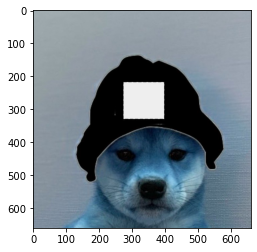

[[0.72373374]]
hat


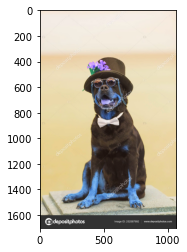

[[0.8213152]]
hat


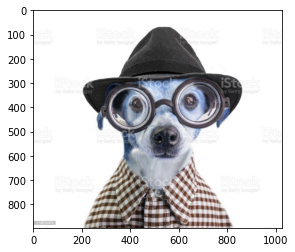

[[0.80459361]]
hat


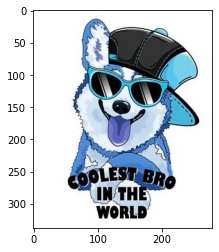

[[0.58592101]]
hat


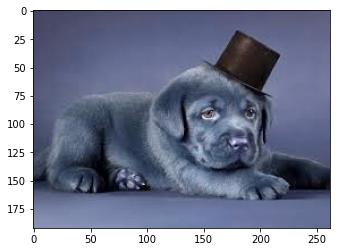

[[0.80731022]]
hat


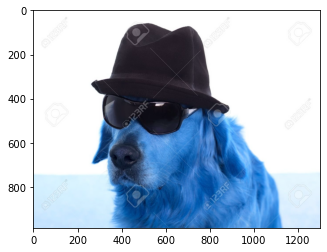

[[0.38597366]]
no hat


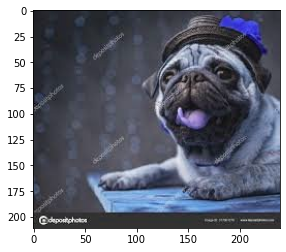

[[0.17246128]]
no hat


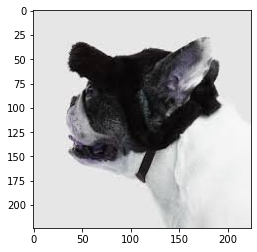

[[0.76902228]]
hat


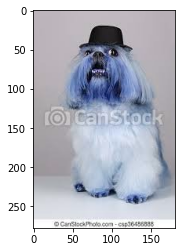

NameError: name 'hatscorrect' is not defined

In [44]:
def predict(model):
    for i in range(10):
        for category in foldername:
            path = os.path.join(test_folder, category)
            counter=0
            for img in os.listdir(path):
                counter+=1
                if counter == i:
                    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_ANYCOLOR)
                    plt.imshow(img_array)
                    img_size=64
                    new_array = cv2.resize(img_array, (img_size,img_size))
                    new_array=np.array(new_array).reshape(-1,img_size,img_size,3)
                    
                    if model=="kerasmodel":
                        prediction=happyModel.predict(new_array)#new_array
                        plt.title(prediction)
                        plt.show()

                    else:
                    
                        longvector = new_array.reshape(new_array.shape[0],-1).T
                        longvector.shape
                        train_X = longvector / 255
                        W1 = parameters["W1"]
                        b1 = parameters["b1"]
                        W2 = parameters["W2"]
                        b2 = parameters["b2"]
                        A1, cache1 = linear_activation_forward(train_X, W1, b1, activation='relu')
                        A2, cache2 = linear_activation_forward(A1, W2, b2, activation='sigmoid')
                        
                        # A2 is the probability of "dog has a hat" (activation of the last sigmoid)
                        print(A2)
                        verdict=""
                        if A2 > 0.5:
                            verdict="hat"
                        else:
                            verdict="no hat"
                        print(verdict)
                        #plt.title(verdict,A2)
                        plt.show()


    print(hatscorrect)
predict("numpymodel")
# numpymodel,kerasmodel